In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from ggplot import *
plt.style.use('default')

ModuleNotFoundError: No module named 'ggplot'

In [6]:
!pip install wordcloud

     |████████████████████████████████| 220 kB 4.9 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=157994 sha256=5e6893b69a5f04b30e50282c58328a4691c527e7294dcfc6e05df686beefe96a
  Stored in directory: /Users/a1s1cmd/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


In [11]:
git_df = pd.read_csv("TopStaredRepositories.csv", parse_dates=['Last Update Date'], dayfirst=True)
git_df.head()

Username         Repository Name  \
0     freeCodeCamp            freeCodeCamp   
1             twbs               bootstrap   
2  EbookFoundation  free-programming-books   
3         facebook                   react   
4               d3                      d3   

                                         Description  \
0  The https://freeCodeCamp.com open source codeb...   
1  The most popular HTML, CSS, and JavaScript fra...   
2                 Freely available programming books   
3  A declarative, efficient, and flexible JavaScr...   
4     Bring data to life with SVG, Canvas and HTML.    

           Last Update Date    Language Number of Stars  \
0 2017-06-24 15:56:17+00:00  JavaScript            290k   
1 2017-06-24 15:40:21+00:00  JavaScript            112k   
2 2017-06-23 01:09:34+00:00         NaN           87.8k   
3 2017-06-24 19:33:49+00:00  JavaScript           69.7k   
4 2017-05-31 06:03:47+00:00  JavaScript           65.7k   

                                                Tags  \
0  nonprofits,certification,curriculum,react,node...   
1     javascript,css,html,bootstrap,jekyll-site,scss   
2                      education,list,books,resource   
3                                                NaN   
4                                      visualization   

                                                 Url  
0       https://github.com/freeCodeCamp/freeCodeCamp  
1                  https://github.com/twbs/bootstrap  
2  https://github.com/EbookFoundation/free-progra...  
3                  https://github.com/facebook/react  
4                           https://github.com/d3/d3

In [12]:
git_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Username          980 non-null    object             
 1   Repository Name   980 non-null    object             
 2   Description       977 non-null    object             
 3   Last Update Date  980 non-null    datetime64[ns, UTC]
 4   Language          877 non-null    object             
 5   Number of Stars   980 non-null    object             
 6   Tags              489 non-null    object             
 7   Url               980 non-null    object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 61.4+ KB


In [13]:
git_df_max = git_df['Number of Stars'].str.contains('k').all()
git_df_max

True

In [14]:
git_df['Number of Stars']=git_df['Number of Stars'].str.replace('k','').astype(float)

In [15]:
git_df.tail()

Username Repository Name  \
975          chrisjenx     Calligraphy   
976           eliangcs     http-prompt   
977  robertdavidgraham         masscan   
978            ElemeFE         mint-ui   
979           lhc70000            iina   

                                           Description  \
975            Custom fonts in Android the easy way...   
976  HTTPie + prompt_toolkit = an interactive comma...   
977  TCP port scanner, spews SYN packets asynchrono...   
978                      Mobile UI elements for Vue.js   
979                 The modern video player for macOS.   

             Last Update Date Language  Number of Stars  \
975 2017-06-06 19:23:22+00:00     Java              6.4   
976 2017-05-11 13:27:42+00:00   Python              6.4   
977 2017-06-22 06:27:09+00:00        C              6.4   
978 2017-06-22 10:02:35+00:00      Vue              6.4   
979 2017-06-24 19:09:31+00:00    Swift              6.4   

                                                  Tags  \
975                                                NaN   
976  python,syntax-highlighting,shell,cli,http,auto...   
977                                                NaN   
978         vue,mobile,component,vue-components,ui-kit   
979                 macos,video,mpv,swift,video-player   

                                              Url  
975      https://github.com/chrisjenx/Calligraphy  
976       https://github.com/eliangcs/http-prompt  
977  https://github.com/robertdavidgraham/masscan  
978            https://github.com/ElemeFE/mint-ui  
979              https://github.com/lhc70000/iina

In [16]:
git_df['Number of Stars'].describe()

count    980.000000
mean      12.985714
std       12.780092
min        6.400000
25%        7.700000
50%        9.500000
75%       14.200000
max      290.000000
Name: Number of Stars, dtype: float64

In [17]:
popular_repos= git_df[git_df['Number of Stars'] > 13.0]
len(popular_repos)

288

In [18]:
popular_repos.head(8)

Username         Repository Name  \
0     freeCodeCamp            freeCodeCamp   
1             twbs               bootstrap   
2  EbookFoundation  free-programming-books   
3         facebook                   react   
4               d3                      d3   
5           getify        You-Dont-Know-JS   
6       tensorflow              tensorflow   
7     sindresorhus                 awesome   

                                         Description  \
0  The https://freeCodeCamp.com open source codeb...   
1  The most popular HTML, CSS, and JavaScript fra...   
2                 Freely available programming books   
3  A declarative, efficient, and flexible JavaScr...   
4     Bring data to life with SVG, Canvas and HTML.    
5    A book series on JavaScript. @YDKJS on twitter.   
6  Computation using data flow graphs for scalabl...   
7                      Curated list of awesome lists   

           Last Update Date    Language  Number of Stars  \
0 2017-06-24 15:56:17+00:00  JavaScript            290.0   
1 2017-06-24 15:40:21+00:00  JavaScript            112.0   
2 2017-06-23 01:09:34+00:00         NaN             87.8   
3 2017-06-24 19:33:49+00:00  JavaScript             69.7   
4 2017-05-31 06:03:47+00:00  JavaScript             65.7   
5 2017-06-23 10:42:36+00:00  JavaScript             62.0   
6 2017-06-24 18:25:42+00:00         C++             61.6   
7 2017-06-24 17:26:02+00:00         NaN             60.7   

                                                Tags  \
0  nonprofits,certification,curriculum,react,node...   
1     javascript,css,html,bootstrap,jekyll-site,scss   
2                      education,list,books,resource   
3                                                NaN   
4                                      visualization   
5  book-series,javascript,training-materials,asyn...   
6  tensorflow,python,machine-learning,deep-neural...   
7      lists,awesome,unicorns,resources,awesome-list   

                                                 Url  
0       https://github.com/freeCodeCamp/freeCodeCamp  
1                  https://github.com/twbs/bootstrap  
2  https://github.com/EbookFoundation/free-progra...  
3                  https://github.com/facebook/react  
4                           https://github.com/d3/d3  
5         https://github.com/getify/You-Dont-Know-JS  
6           https://github.com/tensorflow/tensorflow  
7            https://github.com/sindresorhus/awesome

In [19]:
popular_repos.tail(8)

Username       Repository Name  \
280         jondot  awesome-react-native   
281         apache                 spark   
282        Thibaut               devdocs   
283           chjj                marked   
284           knsv               mermaid   
285  juliangarnier                 anime   
286     designmodo               Flat-UI   
287  julianshapiro              velocity   

                                           Description  \
280  Awesome React Native components, news, tools, ...   
281                             Mirror of Apache Spark   
282                          API Documentation Browser   
283   A markdown parser and compiler. Built for speed.   
284  Generation of diagram and flowchart from text ...   
285                        JavaScript Animation Engine   
286  Flat UI Free - Design Framework (html/css3/les...   
287                  Accelerated JavaScript animation.   

             Last Update Date    Language  Number of Stars  \
280 2017-06-23 05:34:47+00:00        Ruby             13.3   
281 2017-06-24 17:07:10+00:00       Scala             13.3   
282 2017-06-18 23:41:29+00:00        Ruby             13.3   
283 2017-06-12 01:27:25+00:00        HTML             13.2   
284 2017-06-04 07:26:58+00:00  JavaScript             13.2   
285 2017-06-24 15:44:51+00:00  JavaScript             13.1   
286 2017-02-21 20:29:33+00:00         CSS             13.1   
287 2017-05-12 13:58:42+00:00  JavaScript             13.1   

                                                  Tags  \
280             react,mobile,react-native,awesome-list   
281                                                NaN   
282  devdocs,offline,app,documentation,docs,pwa,api...   
283                                                NaN   
284                                                NaN   
285                                    anime,animation   
286                                                NaN   
287                                                NaN   

                                                Url  
280  https://github.com/jondot/awesome-react-native  
281                 https://github.com/apache/spark  
282              https://github.com/Thibaut/devdocs  
283                  https://github.com/chjj/marked  
284                 https://github.com/knsv/mermaid  
285          https://github.com/juliangarnier/anime  
286           https://github.com/designmodo/Flat-UI  
287       https://github.com/julianshapiro/velocity

In [20]:
classified_repos=[]
for i in range(8,300,7):
    x = git_df[(git_df['Number of Stars'] >= i) & (git_df['Number of Stars'] <(i+7.0))]
    classified_repos.append(len(x))

In [21]:
indexes = []

for i in range (8000,300000, 7000):
    x = '[' + str(i) +','+ (str(i+7000)) + ')'
    indexes.append(x)

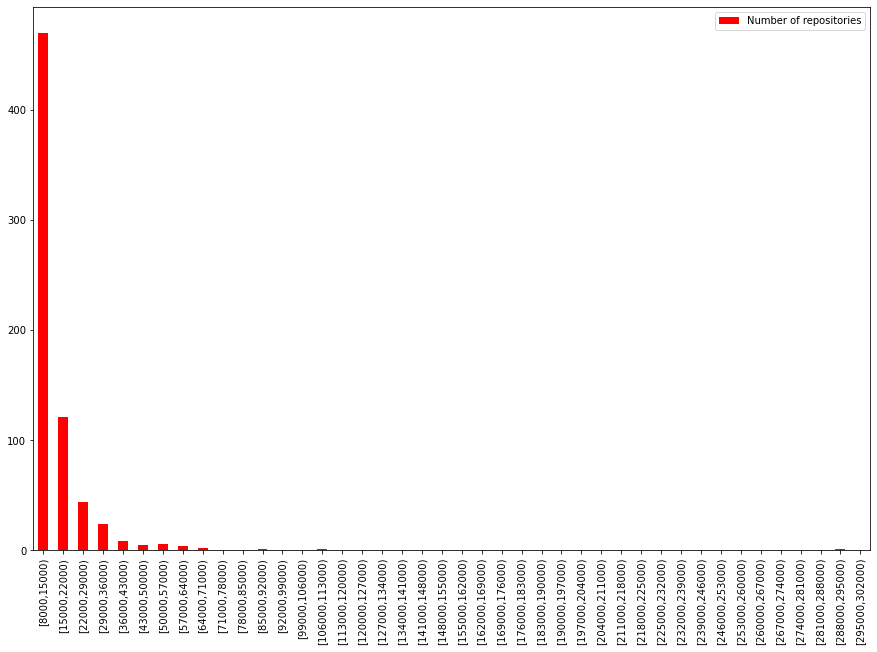

In [22]:
divided_repos = pd.Series(data=classified_repos, index=indexes)
divided_repos.plot(kind='bar', figsize=(15,10), color=['red'],legend=True, label='Number of repositories')

In [23]:
x=git_df['Language'].value_counts()
x.head()

JavaScript     338
Java            67
Python          63
Ruby            44
Objective-C     43
Name: Language, dtype: int64

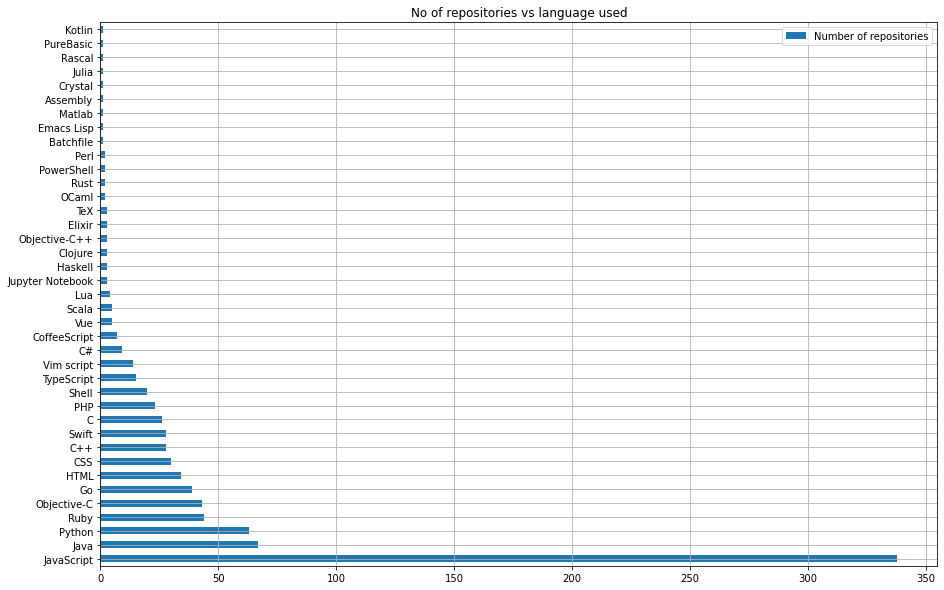

In [24]:
%matplotlib inline
plt.figure()
x.plot(kind='barh',figsize=(15,10),grid=True, label='Number of repositories',legend='No of repos',title='No of repositories vs language used')

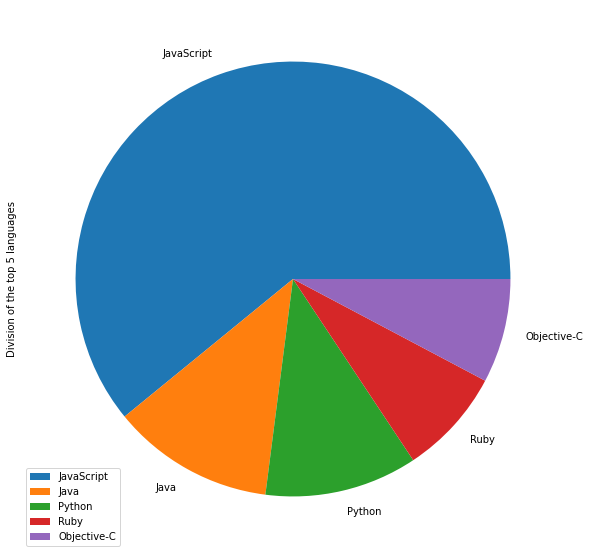

In [25]:
%matplotlib inline
x[:5].plot.pie(label="Division of the top 5 languages",fontsize=10,figsize=(10,10),legend=True)

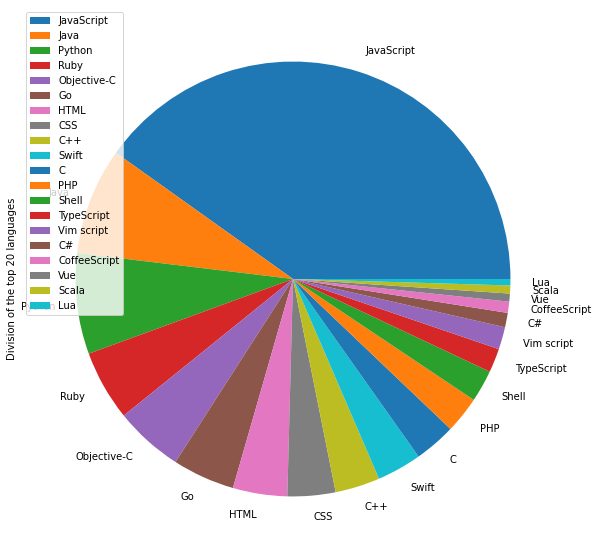

In [26]:
%matplotlib inline
x[:20].plot.pie(label="Division of the top 20 languages",fontsize=10,figsize=(10,10),legend=True)